# Создание и визуализация простых графов

__Автор задач: Макрушин С.В (SVMakrushin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 1: Введение в сетевой анализ и знакомство с библиотекой NetworkX"
* Документация:
    * https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs
    * https://networkx.github.io/documentation/stable/reference/drawing.html
    * https://networkx.org/documentation/stable/reference/generators.html

### Создание и визуализация графов в `networkx`

1.1 Создать функцию, генерирующую кольцевой граф из `n` узлов (`n` - параметр функции).

1.2. Визуализировать граф, построенный с помощью функции из задания 1.1.

1.3. Создать функцию, генерирующую граф `Y` из `3n + 1` узлов (`n` - параметр функции), где центральный узел соединен с тремя путями длины n. Визуализировать полученный граф.

![](img/3_1.png)

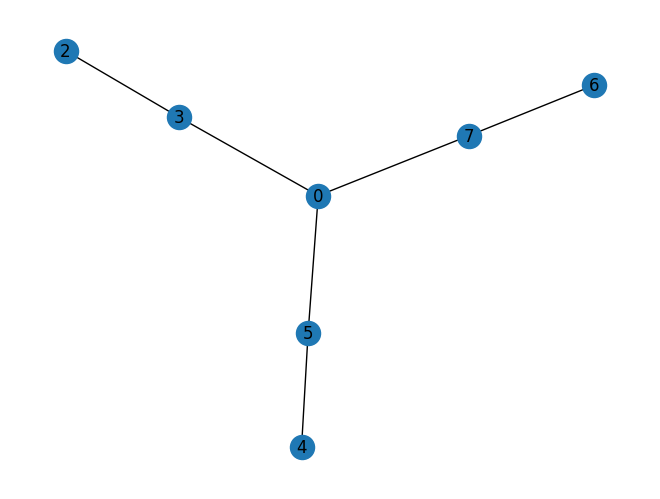

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_path_graph(n: int) -> nx.Graph:
    G = nx.Graph()
    start_node = 0
    G.add_node(start_node)
    num_paths = 3
    for _ in range(num_paths):
        new_nodes = range(len(G) + 1, len(G) + n - 1)
        nx.add_path(G, new_nodes)
        G.add_edge(start_node, len(G))

    return G

G = create_path_graph(n = 4)
nx.draw(G, with_labels = True)

### Построение решеток

2.1 Построить квадратную решетку 5 на 4, используя встроенную функцию `networkx`, и визуализировать ее.

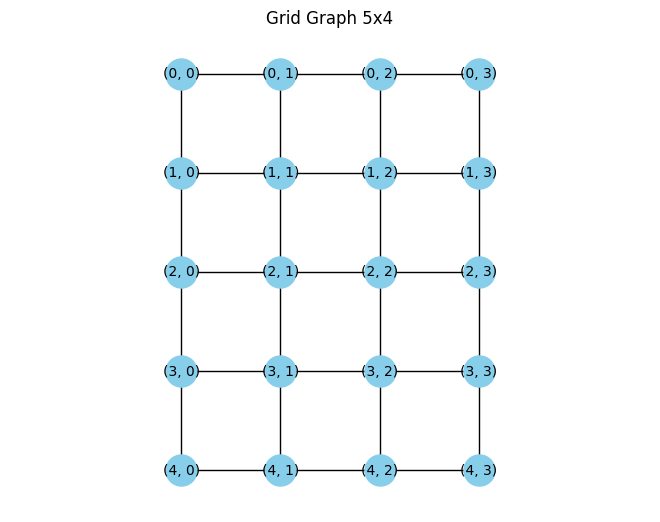

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_grid_graph(rows, cols):
    G = nx.grid_2d_graph(rows, cols)
    return G

rows = 5
cols = 4
grid_graph = generate_grid_graph(rows, cols)
pos = {(x, y): (y, -x) for x, y in grid_graph.nodes()}

nx.draw(grid_graph, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black')
plt.title(f"Grid Graph {rows}x{cols}")
plt.axis('equal')
plt.show()


2.2 Реализовать собственную функцию создания квадратной решетки `n` на `m`. Создать с ее помощью решетку 5 на 4 и визуализировать ее.

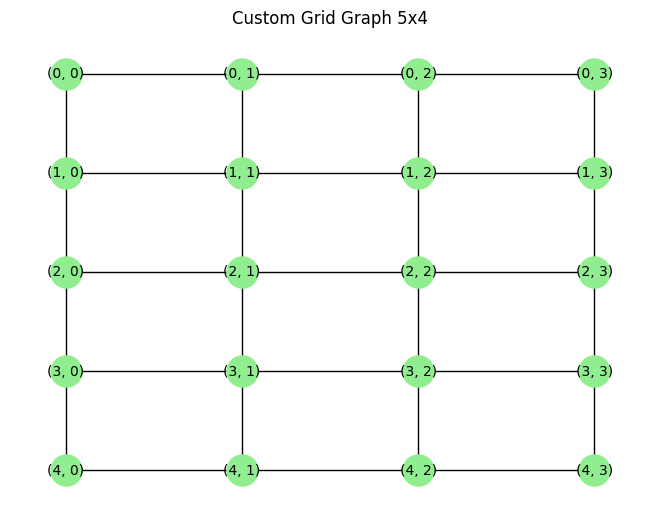

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_grid_graph(n, m):
    G = nx.Graph()
    for i in range(n):
        for j in range(m):
            node = (i, j)
            G.add_node(node)
            if i > 0:
                G.add_edge((i-1, j), node)
            if j > 0:
                G.add_edge((i, j-1), node)
    return G

n = 5
m = 4
grid_graph = create_grid_graph(n, m)

pos = {(x, y): (y, -x) for x, y in grid_graph.nodes()}
nx.draw(grid_graph, pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=10, font_color='black')
plt.title(f"Custom Grid Graph {n}x{m}")
plt.show()


2.3 Реализовать собственную функцию создания квадратной решетки `n` на `m`, которая сохраняет в графе информацию, позволяющую визуализировать сеть в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.

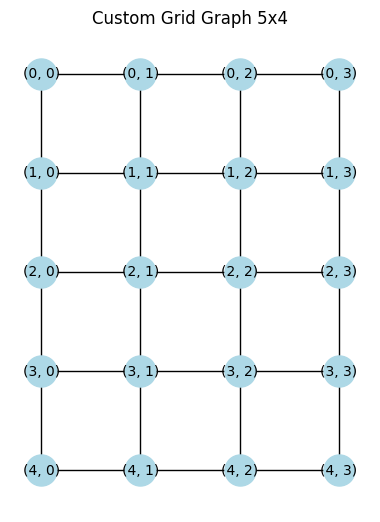

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_grid_graph(n, m):
    G = nx.Graph()
    for i in range(n):
        for j in range(m):
            node = (i, j)
            G.add_node(node, pos=(j, -i))  # Инвертируем i для корректного отображения
            if i > 0:
                G.add_edge((i-1, j), node)
            if j > 0:
                G.add_edge((i, j-1), node)
    return G

n = 5
m = 4
grid_graph = create_grid_graph(n, m)

pos = nx.get_node_attributes(grid_graph, 'pos')
nx.draw(grid_graph, pos=pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title(f"Custom Grid Graph {n}x{m}")
plt.gca().set_aspect('equal')  # Устанавливаем соотношение сторон для правильной решетки
plt.show()


2.4 Модифицировать функцию 2.3 так, чтобы решетку можно было замыкать по строкам и по столбцам (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.

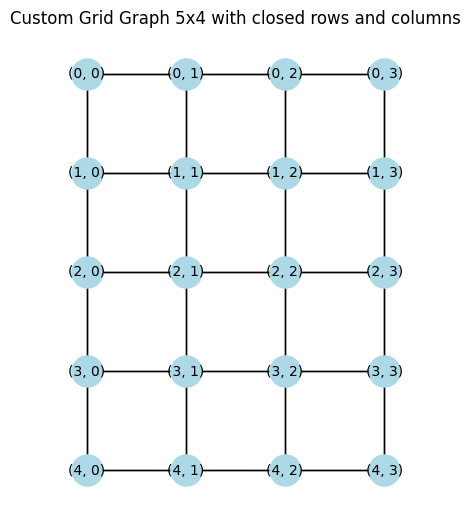

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_grid_graph(n, m, close_rows=False, close_columns=False):
    G = nx.Graph()
    for i in range(n):
        for j in range(m):
            node = (i, j)
            G.add_node(node, pos=(j, -i))  # Инвертируем i для корректного отображения
            if i > 0:
                G.add_edge((i-1, j), node)
            if j > 0:
                G.add_edge((i, j-1), node)
    if close_rows:
        for j in range(m):
            G.add_edge((n-1, j), (0, j), color='red')
    if close_columns:
        for i in range(n):
            G.add_edge((i, m-1), (i, 0), color = 'red')
    return G

n = 5
m = 4
grid_graph = create_grid_graph(n, m, close_rows=True, close_columns=True)

pos = nx.get_node_attributes(grid_graph, 'pos')
nx.draw(grid_graph, pos=pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title(f"Custom Grid Graph {n}x{m} with closed rows and columns")
plt.gca().set_aspect('equal')  # Устанавливаем соотношение сторон для правильной решетки
plt.show()


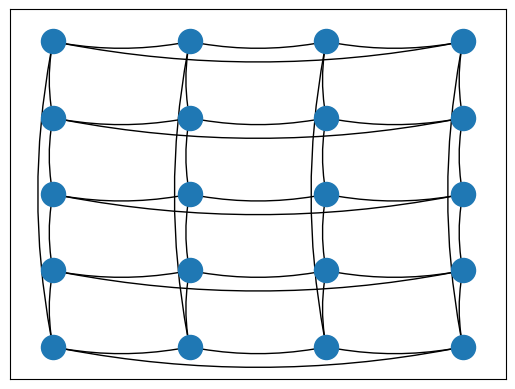

In [ ]:
nx.draw_networkx_nodes(
    grid_graph,
    pos,
)

nx.draw_networkx_edges(
    grid_graph,
    pos=pos,
    connectionstyle="arc3,rad=0.1",
    arrows=True,
);

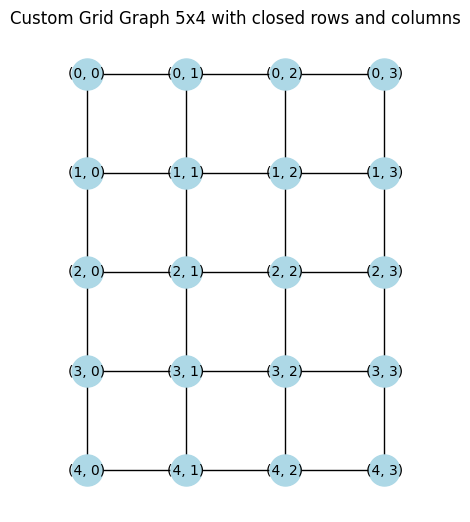

In [ ]:
grid_graph = create_grid_graph(n, m, close_rows=False, close_columns=False)
pos = nx.get_node_attributes(grid_graph, 'pos')
nx.draw(grid_graph, pos=pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title(f"Custom Grid Graph {n}x{m} with closed rows and columns")
plt.gca().set_aspect('equal')  # Устанавливаем соотношение сторон для правильной решетки
plt.show()

### (u, v) цветок


Граф «(u,v) цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длиной u и v соответственно (см.рис).

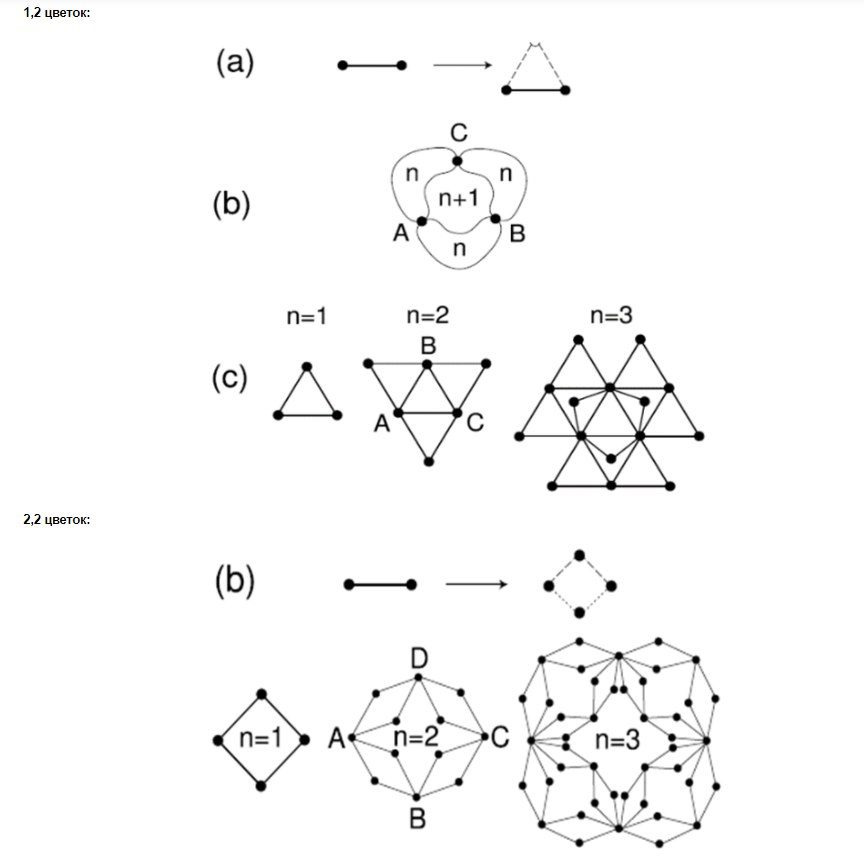

3.1 Реализовать функцию построения (1, 2) цветка. Функция принимает один целочисленный параметр `n` - количество шагов построения.

In [ ]:
def create_flower_graph(n):
    G = nx.Graph()
    G.add_node(0)
    G.add_node(1)
    G.add_edge(0, 1)
    for i in range(n):
        G_fin = list(G.edges)
        for edge in G_fin:
            G.add_node(max(G.nodes)+1)
            G.add_edge(list(edge)[0], max(G.nodes))
            G.add_edge(list(edge)[1], max(G.nodes))
    return G

In [ ]:
G = create_flower_graph(3)

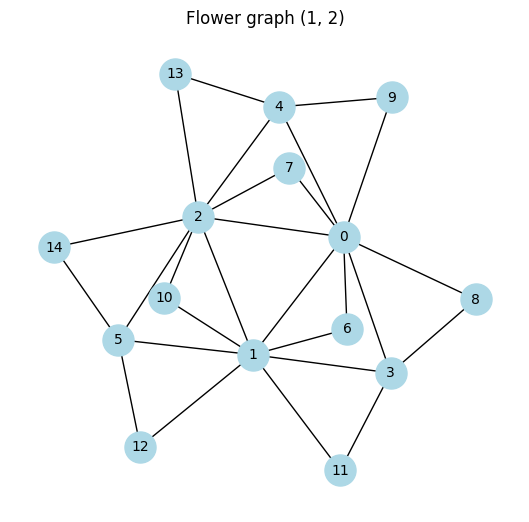

In [ ]:
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title(f"Flower graph (1, 2)")
plt.gca().set_aspect('equal')  # Устанавливаем соотношение сторон для правильной решетки
plt.show()

3.2 Для графа, построенного в задаче 3.1, посчитать количество узлов, количество связей, среднюю степень узла.

In [ ]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 5), (1, 6), (1, 10), (1, 11), (1, 12), (2, 4), (2, 5), (2, 7), (2, 10), (2, 13), (2, 14), (3, 8), (3, 11), (4, 9), (4, 13), (5, 12), (5, 14)])

In [ ]:
len(G.nodes)

15

In [ ]:
len(G.edges)

27

In [ ]:
len(G.edges)*2 / len(G.nodes)

3.6

3.3 Визуализировать граф, построенный в задаче 3.1, с указанием идентификаторов узлов.

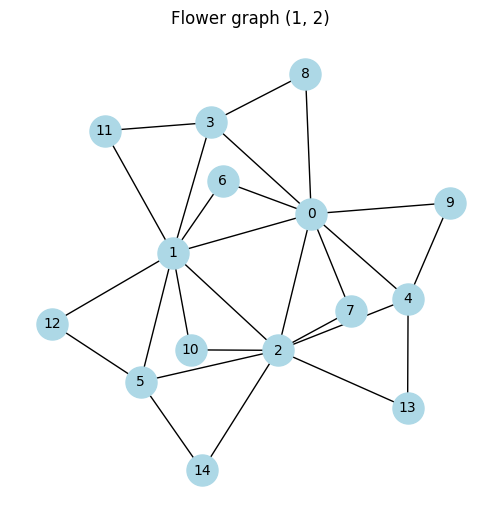

In [ ]:
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title(f"Flower graph (1, 2)")
plt.gca().set_aspect('equal')  # Устанавливаем соотношение сторон для правильной решетки
plt.show()

3.4 Для графа, построенного в задаче 3.1, посчитать степень каждого узла и сохранить информацию о ней в самом узле

In [ ]:
for i in range(len(G.nodes)):
  weight = len(G.edges(i))
  G.add_node(i, w=weight, clr='#99e6ff')

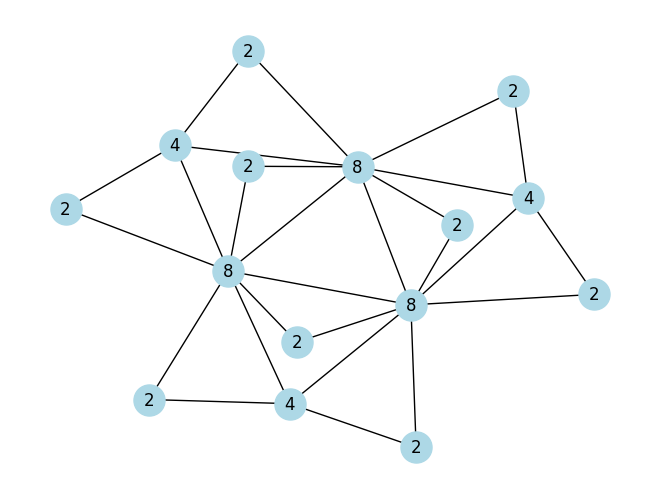

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=False, node_size=500, node_color='lightblue', font_size=10, font_color='black')
nx.draw_networkx_labels(G, pos=pos, labels=nx.get_node_attributes(G, 'w'))
plt.show()


3.5 Создать визуализацию графа, построенного в задаче 3.1, в которой размер узла определяется его степенью (с указанием идентификаторов узлов).

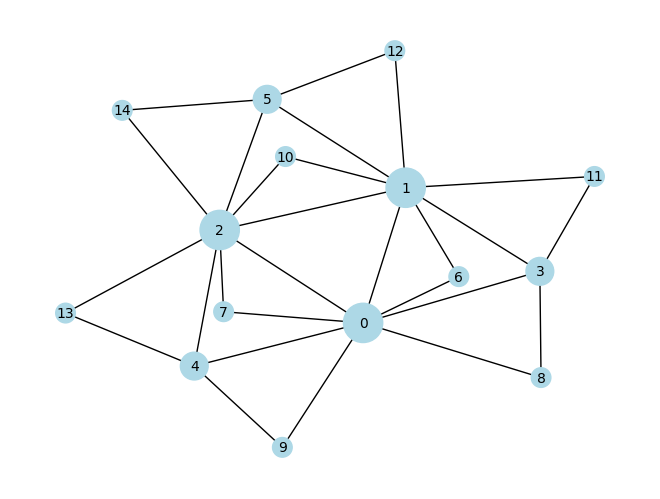

In [ ]:
pos = nx.spring_layout(G)
degrees = dict(G.degree())
node_sizes = [v * 100 for v in degrees.values()]
nx.draw(G, pos=pos, with_labels=True, node_size=node_sizes, node_color='lightblue', font_size=10, font_color='black')
#nx.draw_networkx_labels(G, pos=pos, labels=nx.get_node_attributes(G, 'w'))
plt.show()

3.6 Реализовать функцию построения (u,v) цветка. Функция принимает на вход 3 параметра: `u` – длина 1го пути при замене связи; `v` – длина 2го пути при замене связи; `n` - количество шагов построения.

# 1-я версия

In [ ]:
import numpy as np

In [ ]:
def create_flower_graph_uv(u, v, n):
    G = nx.Graph()
    G.add_node(0)
    G.add_node(1)
    G.add_edge(0, 1)
    if u == 1:
      for i in range(n):
        G_fin = list(G.edges)
        for edge in G_fin:
            G.add_node(max(G.nodes)+1)
            G.add_edge(list(edge)[0], max(G.nodes))
            G.add_edge(list(edge)[1], max(G.nodes))
      return G
    for i in range(n):
        G_fin = list(G.edges)
        for edge in G_fin:
            G.remove_edge(list(edge)[0], list(edge)[1])
            new_nodes = np.array([0]*(v+1)*u).reshape(u, v+1)
            for j in range(u):
              for s in range(v-1):
                new_nodes[j][s+1] = max(G.nodes)+1
                G.add_node(max(G.nodes)+1)
            for m in range(u):
              new_nodes[m][v] = list(edge)[1]
              new_nodes[m][0] = list(edge)[0]
            for i in range(u):
              for j in range(v):
                G.add_edge(new_nodes[i][j], new_nodes[i][j+1])

    return G

In [ ]:
G = create_flower_graph_uv(2, 2, 3)

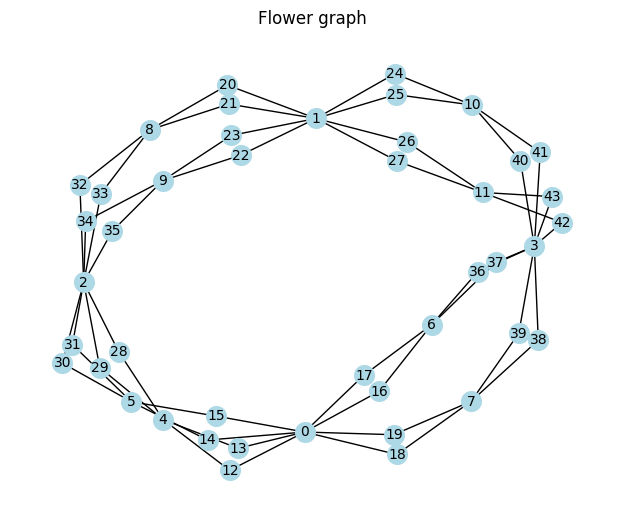

In [ ]:
nx.draw(G, with_labels=True, node_size=200, node_color='lightblue', font_size=10, font_color='black')
plt.title(f"Flower graph")
plt.gca().set_aspect('equal')  # Устанавливаем соотношение сторон для правильной решетки
plt.show()

# 2-я версия

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def create_flower_graph_uv_2(u, v, n):
    G = nx.Graph()
    G.add_node(0)
    G.add_node(1)
    G.add_edge(0, 1)
    if u == 1 or v == 1:
      for i in range(n):
        G_fin = list(G.edges)
        for edge in G_fin:
            G.add_node(max(G.nodes)+1)
            G.add_edge(list(edge)[0], max(G.nodes))
            G.add_edge(list(edge)[1], max(G.nodes))
      return G
    for i in range(n):
        G_fin = list(G.edges)
        for edge in G_fin:
            G.remove_edge(list(edge)[0], list(edge)[1])

            new_nodes_u = []
            new_nodes_u.append(list(edge)[0])
            new_nodes_v = []
            new_nodes_v.append(list(edge)[0])

            for j in range(u-1):
              new_nodes_u.append(max(G.nodes)+1)
              G.add_node(max(G.nodes)+1)
            for s in range(v-1):
              new_nodes_v.append(max(G.nodes)+1)
              G.add_node(max(G.nodes)+1)
            new_nodes_u.append(list(edge)[1])
            new_nodes_v.append(list(edge)[1])

            for i in range(u):
              G.add_edge(new_nodes_u[i], new_nodes_u[i+1])
            for i in range(v):
              G.add_edge(new_nodes_v[i], new_nodes_v[i+1])

    return G

In [ ]:
G = create_flower_graph_uv_2(3, 2, 2)

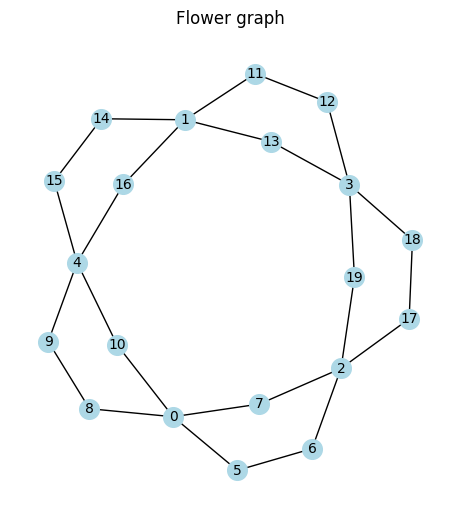

In [ ]:
nx.draw(G, with_labels=True, node_size=200, node_color='lightblue', font_size=10, font_color='black')
plt.title(f"Flower graph")
plt.gca().set_aspect('equal')  # Устанавливаем соотношение сторон для правильной решетки
plt.show()